In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

# Creating the dataset
data = {
    'Age': [22, 25, 47, 52, 46, 56, 32, 44, 36, 28],
    'Income': [15000, 18000, 35000, 45000, 32000, 49000, 21000, 41000, 25000, 22000],
    'Has_Purchased_Before': [0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
    'Will_Purchase': [0, 0, 1, 1, 1, 1, 0, 1, 0, 0]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Splitting the dataset into features (X) and target (y)
X = df[['Age', 'Income', 'Has_Purchased_Before']]
y = df['Will_Purchase']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Measuring the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy:.2f}")


Accuracy of KNN classifier: 1.00


In [19]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix: ", cm)

Confusion matrix:  [[2 0]
 [0 1]]


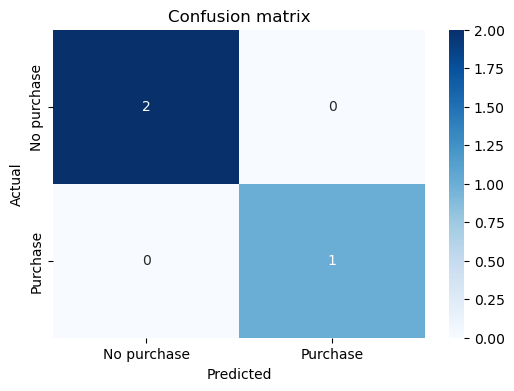

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No purchase', 'Purchase'], yticklabels=['No purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()